In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
train

url  doc_id  label
0   http://elbe-elster-klinikum.de/fachbereiche/ch...       1      1
1   http://klinikum-bayreuth.de/einrichtungen/zent...       3      3
2   http://klinikum-braunschweig.de/info.php/?id_o...       4      1
3   http://klinikum-braunschweig.de/info.php/?id_o...       5      1
4   http://klinikum-braunschweig.de/zuweiser/tumor...       6      3
..                                                ...     ...    ...
95   http://www.unicross.uni-freiburg.de/thema/unifm/     140      1
96  http://www.uniklinik-duesseldorf.de/patienten-...     141      1
97  http://www.vivantes.de/fuer-sie-vor-ort/klinik...     144      2
98  http://www.vivantes.de/fuer-sie-vor-ort/klinik...     145      2
99  http://www.walburga-krankenhaus.de/wk/artikel/...     146      1

[100 rows x 3 columns]

In [2]:
list(train.label).count(1)

32

In [4]:
list(train.label).count(2)

59

In [5]:
list(train.label).count(3)

9

In [38]:
test = pd.read_csv("test.csv")
len(test)

48

In [39]:
test

url  doc_id
0   http://chirurgie-goettingen.de/medizinische-ve...       0
1   http://evkb.de/kliniken-zentren/chirurgie/allg...       2
2   http://krebszentrum.kreiskliniken-reutlingen.d...       7
3   http://marienhospital-buer.de/mhb-av-chirurgie...      15
4   http://marienhospital-buer.de/mhb-av-chirurgie...      16
5   http://onkozentrum.med.uni-rostock.de/informat...      24
6   http://www.asklepios.com/goslar/experten/haema...      31
7   http://www.asklepios.com/hamburg/altona/expert...      32
8   http://www.barmherzige-regensburg.de/herzrhyth...      36
9   http://www.barmherzige-regensburg.de/zentrum-f...      38
10  http://www.bbtgruppe.de/zentrale/projektueberg...      39
11  http://www.chirurgie.uk-erlangen.de/aktuelles/...      43
12  http://www.ctk.de/klinikum/karriere/stellenang...      46
13  http://www.ctk.de/klinikum/kliniken-zentren/ze...      47
14  http://www.diakovere.de/unternehmen-und-mehr/k...      50
15  http://www.drk-kliniken-berlin.de/radiologie-k...      51
16  http://www.evkln.de/kliniken-institute-zentren...      53
17  http://www.gesundheit-nordhessen.de/en/zentrum...      56
18  http://www.gesundheitnord.de/krankenhaeuserund...      58
19  http://www.gesundheitszentrum-wetterau.de/342/...      59
20  http://www.gfo-kliniken-bonn.de/fachabteilunge...      60
21  http://www.gp-ruesselsheim.de/01_gpr_gruppe/02...      62
22  http://www.helios-gesundheit.de/kliniken/schwe...      65
23  http://www.helios-gesundheit.de/nrw/helios-tum...      66
24  http://www.hjk-muenster.de/unsere-kompetenzen/...      68
25  http://www.hufeland.de/de/abteilung-fuer-gastr...      69
26  http://www.interdisziplinaere-endoskopie.mri.t...      70
27  http://www.josephstift-dresden.de/pressemittei...      71
28  http://www.klilu.de/medizin__pflege/kliniken_u...      74
29  http://www.kliniksued-rostock.de/kliniken-abte...      78
30  http://www.klinikum-esslingen.de/kliniken-und-...      82
31  http://www.klinikum-esslingen.de/kliniken-und-...      84
32  http://www.klinikum-esslingen.de/kliniken-und-...      87
33  http://www.klinikum-oberberg.de/en/karriere-au...      91
34  http://www.klinikverbund-suedwest.de/kliniken-...      99
35  http://www.krupp-krankenhaus.de/allg-viszeralc...     103
36  http://www.malteser-franziskus.de/medizin-pfle...     104
37  http://www.maria-josef-hospital.de/unsere-komp...     109
38   http://www.medizin.uni-halle.de/?bf=&id=2947&l=0     113
39  http://www.muk.uni-frankfurt.de/pressemitteilu...     116
40  http://www.pius-hospital.de/kliniken/gynaekolo...     123
41  http://www.prosper-hospital.de/brustkrebs.1312...     124
42  http://www.siemens-healthineers.com/de/digital...     127
43  http://www.uk-augsburg.de/krebsbehandlung/diag...     134
44  http://www.ukb.uni-bonn.de/42256bc8002af3e7/vw...     135
45  http://www.uniklinikum-leipzig.de/einrichtunge...     142
46  http://www.vidia-kliniken.de/job-und-karriere/...     143
47  http://www.zollernalb-klinikum.de/medizin/klin...     147

In [58]:

from bs4 import BeautifulSoup
from pprint import pprint
import requests
from langdetect import detect

headers = {
           "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0",
           "Accept": "application/json",
           "Accept-Language": "en-US",
           "Accept-Encoding": "gzip, deflate, br",
           "X-Requested-With": "XMLHttpRequest"
           }

train['page'] = 'EMPTY'

i=0
for page in train.url:
    print(page)

    try:
        html = requests.get(page, headers=headers)

        soup = BeautifulSoup(html.text, 'html.parser')
        text = soup.find_all(text=True)

        output = ''
        blacklist = [
        '[document]',
        'noscript',
        'header',
        'html',
        'meta',
        'head', 
        'input',
        'script',
            'img', 'a', 'div','right','left','style',
        # there may be more elements we don't want
        ]



        for t in text:
            if t.parent.name not in blacklist:
                output += '{} '.format(t)
        train.loc[train.index[i], 'page'] = output
        i+=1

    except requests.exceptions.RequestException as e:  # This is the correct syntax
        #raise SystemExit(e)
        continue

http://elbe-elster-klinikum.de/fachbereiche/chirurgie/chirurgie-finsterwalde/
http://klinikum-bayreuth.de/einrichtungen/zentren/onkologisches-zentrum/
http://klinikum-braunschweig.de/info.php/?id_object=512&object=contact
http://klinikum-braunschweig.de/info.php/?id_object=622&object=product&parent=2989&parent_object=product
http://klinikum-braunschweig.de/zuweiser/tumorkonferenzen.php/?id_object=1429&object=product
http://krebszentrum.kreiskliniken-reutlingen.de/klinik-datenschutz/klinik-impressum/artikel-impressum.html/
http://krebszentrum.kreiskliniken-reutlingen.de/klinik-kompetenz-zentren/brustzentrum/aesthetische-brustchirurgie/
http://krebszentrum.kreiskliniken-reutlingen.de/klinik-presse-und-auszeichnungen/artikel-presse-auszeichnungen.html/
http://krebszentrum.kreiskliniken-reutlingen.de/klinik-startseite/artikel-haut.html/
http://krebszentrum.kreiskliniken-reutlingen.de/klinik-weitere-tumorerkrankungen/magen/artikel-magen.html/
http://krebszentrum.kreiskliniken-reutlingen.de/

SSLError: ("read error: Error([('SSL routines', 'ssl3_read_n', 'unexpected eof while reading')])",)

In [59]:
train[50:60]

Unnamed: 0                                                url  doc_id  \
50          50  http://www.klinikum-esslingen.de/kliniken-und-...      80   
51          51  http://www.klinikum-esslingen.de/kliniken-und-...      81   
52          52  http://www.klinikum-esslingen.de/kliniken-und-...      83   
53          53  http://www.klinikum-esslingen.de/kliniken-und-...      85   
54          54  http://www.klinikum-esslingen.de/kliniken-und-...      86   
55          55  http://www.klinikum-esslingen.de/kliniken-und-...      88   
56          56  http://www.klinikum-fichtelgebirge.de/leistung...      89   
57          57  http://www.klinikum-guetersloh.de/kliniken/fra...      90   
58          58  http://www.klinikum-oberberg.de/en/standorte/k...      92   
59          59  http://www.klinikum-offenbach.de/der-sana-medi...      93   

    label                                               page  \
50      2  Weichteilchirurgie | Allgemein- und Viszeralch...   
51      2  Klinische Studien / Forschung | Onkologisches ...   
52      2  Unser Profil | Gefäß- und Thoraxchirurgie | Kl...   
53      2  Unser Profil | Gefäß- und Thoraxchirurgie | Kl...   
54      2  Unser Profil | Klinikum Esslingen \n \n \n \n ...   
55      2                                              EMPTY   
56      3                                              EMPTY   
57      1                                              EMPTY   
58      1                                              EMPTY   
59      1                                              EMPTY   

                                      page_stop_words  
50  Weichteilchirurgie | Allgemein- und Viszeralch...  
51  Klinische Studien / Forschung | Onkologisches ...  
52  Unser Profil | Gefäß- und Thoraxchirurgie | Kl...  
53  Unser Profil | Gefäß- und Thoraxchirurgie | Kl...  
54  Unser Profil | Klinikum Esslingen \n \n \n \n ...  
55  Seite nicht gefunden | Klinikum Esslingen \n \...  
56  Klinikum Fichtelgebirge - Chirurgische Klinik ...  
57  Wochenstation · Klinikum Gütersloh  Einverstan...  
58  Beteiligung an Therapieoptimierungsstudien Onk...  
59  Forschung & Lehre | Offenbach | Sana Kliniken ...

there is an issue with scapping some urls, need more time to dive into it

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaasi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
print (stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [17]:
from sklearn.feature_extraction import text

#en_additional_stop_words = ['much','best','Im','will','year']
en_stop_words = nltk.corpus.stopwords.words('english')
de_stop_words = nltk.corpus.stopwords.words('german')
sw = set(en_stop_words+de_stop_words)

In [18]:
train['page_stop_words'] = train['page']

In [19]:
for index, row in train.iterrows():
    page = ''
    for x in row['page_stop_words'].split():
        if x.strip().lower() not in sw: 
            page = page +' '+ x.strip()
    row['page_stop_words'] = page

In [20]:
train.to_csv('train_texts.csv')

# Topic Modeling

In [21]:
papers = pd.read_csv("train_texts.csv")

In [22]:
# Remove the columns
#papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)

# Print out the first rows of papers
papers['page_stop_words']

0     Elbe-Elster Klinikum - Chirurgie Finsterwalde ...
1     Onkologisches Zentrum | Klinikum Bayreuth   \n...
2     Zentrum - Sozialpädiatrisches Zentrum - Städti...
3     Leistung - Spezielle Unterstützung bei der Anm...
4     Zuweiser - Tumorkonferenzen - Tumorkonferenz G...
                            ...                        
95                                                EMPTY
96                                                EMPTY
97                                                EMPTY
98                                                EMPTY
99                                                EMPTY
Name: page_stop_words, Length: 100, dtype: object

In [23]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['page_stop_words'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    elbe-elster klinikum - chirurgie finsterwalde ...
1    onkologisches zentrum | klinikum bayreuth   \n...
2    zentrum - sozialpädiatrisches zentrum - städti...
3    leistung - spezielle unterstützung bei der anm...
4    zuweiser - tumorkonferenzen - tumorkonferenz g...
Name: paper_text_processed, dtype: object

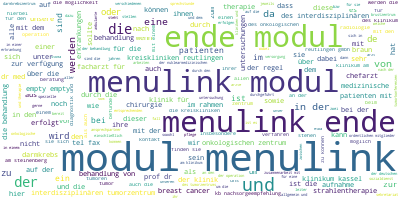

In [24]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

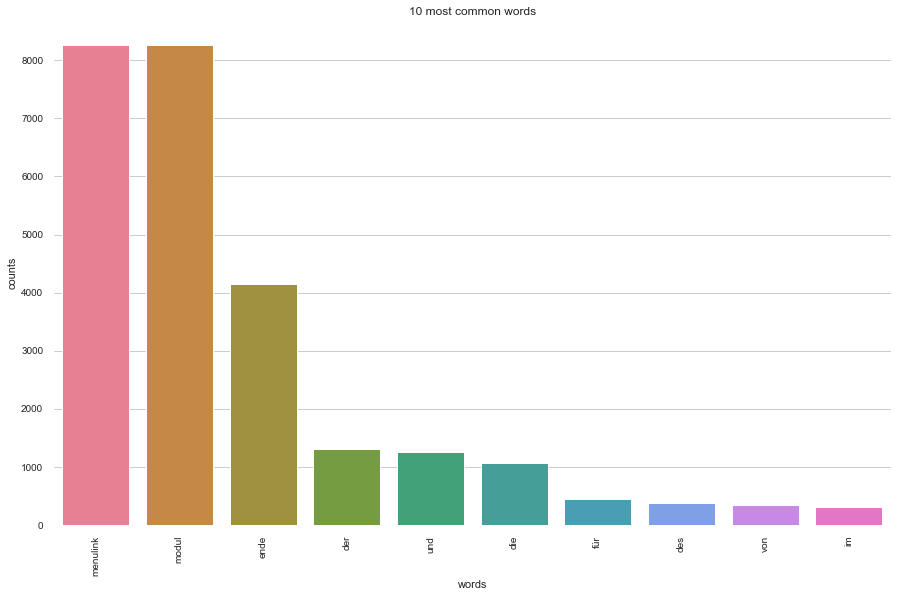

In [25]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [26]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 3
number_words = 100

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
der und die für des von mit werden eine im ist sie den das zu bei patienten oder auf auch durch wird zur klinik sind dem klinikum ein einer sich wir über behandlung können als nach nicht kann dr sowie es alle wie zentrum einen unsere um einem uns zum chefarzt interdisziplinären aus diese vor therapie chirurgie bis diagnostik unter kliniken untersuchung erfolgt operation ihre eines 0921 400 hier kassel dass uhr tel tumorzentrums onkologischen weitere mitglieder dieser rahmen darmkrebs krankenhaus gmbh unserer erkrankungen durchgeführt 05251 tumorzentrum dabei tumorkonferenz sollte zentren interdisziplinäre ihnen kb untersuchungen wenn prof ihrer zusammenarbeit betreuung

Topic #1:
menulink modul ende die reutlingen der kreiskliniken sie ist im von besucher gmbh patientensicherheit klinikum steinenberg den eine und babygalerie krankenhaus geburt regionales pro bad bis finden nur mvz sich urach qualitätsmedizin münsingen initiative aktionsbündnis uhr auf z

In [29]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

TypeError: write() argument must be str, not bytes

In [30]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.153133  0.150473       1        1  55.420650
1      0.321023 -0.004542       2        1  37.872653
2     -0.167891 -0.145931       3        1   6.706696, topic_info=          Term         Freq        Total Category  logprob  loglift
5284     modul  7340.000000  7340.000000  Default  30.0000  30.0000
5172  menulink  7340.000000  7340.000000  Default  29.0000  29.0000
2540      ende  3680.000000  3680.000000  Default  28.0000  28.0000
7581       und  1133.000000  1133.000000  Default  27.0000  27.0000
2103       der  1187.000000  1187.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2103       der    20.728979  1187.726311   Topic3  -5.2704  -1.3462
3222       für    11.932123   400.746742   Topic3  -5.8227  -0.8120
2273        dr     8.477671    92.694115   Topic3  -6.1645   0.3102
4061        im     7.137488   288.446508   Topic3  -6.3366  -0.9971
7520       uhr     6.631597    63.846689   Topic3  -6.4101   0.4374

[207 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
19        3  0.953235  03531
48        1  0.984244   0921
76        1  0.122540     11
76        3  0.857778     11
96        1  0.385931     13
...     ...       ...    ...
8422      1  0.945150     zu
8422      2  0.056622     zu
8451      1  0.995009    zum
8457      1  0.950109    zur
8457      2  0.048546    zur

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

# Basic classifier evaluation

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=set(en_stop_words+de_stop_words), analyzer='word') #,ngram_range=(1,1),2-grams and 3-grams 

In [64]:
train = pd.read_csv("train_texts.csv")


In [65]:
x = tfidf_vectorizer.fit_transform(train.page_stop_words[0:84].values.astype('U'))

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x[0:84], train.label[0:84], train_size = 0.50, random_state = 10)

C:\Users\aaasi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, y_train)

In [68]:
predicted = clf.predict(x_test)
clf.score(x_test, y_test)

0.5238095238095238

In [69]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


models = [LogisticRegression, SGDClassifier, SVC, LinearSVC, BernoulliNB, MultinomialNB]

In [70]:
from sklearn.metrics import f1_score
for model in models:
    clf = model().fit(x_train, y_train)
    print(clf.predict(x_test))
    print(clf.score(x_test, y_test))
    print(f1_score(y_test, clf.predict(x_test), average='weighted'))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
0.5238095238095238
0.36011904761904767
[2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2]
0.5
0.3826973412315745
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
0.5238095238095238
0.36011904761904767
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
0.5238095238095238
0.36011904761904767
[2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2]
0.4523809523809524
0.33174603174603173
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
0.5238095238095238
0.36011904761904767


C:\Users\aaasi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aaasi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aaasi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaasi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default m

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(x_test))

array([[ 0, 14,  0],
       [ 0, 22,  0],
       [ 0,  6,  0]], dtype=int64)

In [73]:
#train.label[0:84]
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.page[0:84].values.astype('U'))
X_train_counts.shape

(84, 12857)

In [51]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(84, 13957)

In [52]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf[0:60], train.label[0:60])
print(clf.score(X_train_tfidf[60:84], train.label[60:84]))

0.625


In [53]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(train.page[0:60], train.label[0:60])

In [54]:
# Performance of NB Classifier
import numpy as np
predicted = text_clf.predict(train.page[60:84])
np.mean(predicted == train.label[60:84])

0.625

In [55]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(train.page[0:60], train.label[0:60])
predicted_svm = text_clf_svm.predict(train.page[60:84])
np.mean(predicted_svm == train.label[60:84])

C:\Users\aaasi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.5833333333333334

In [ ]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

In [ ]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train.page[0:60], train.label[0:60])

In [ ]:
# To see the best mean score and the params, run the following code

gs_clf.best_score_
gs_clf.best_params_

# Output for above should be: The accuracy has now increased to ~90.6% for the NB classifier (not so naive anymore! 😄)
# and the corresponding parameters are {‘clf__alpha’: 0.01, ‘tfidf__use_idf’: True, ‘vect__ngram_range’: (1, 2)}.

In [ ]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(train.page[0:60], train.label[0:60])


gs_clf_svm.best_score_
gs_clf_svm.best_params_


In [220]:
# NLTK
# Removing stop words
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

In [ ]:
# Stemming Code

import nltk
nltk.download()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(train.page[0:60], train.label[0:60])

predicted_mnb_stemmed = text_mnb_stemmed.predict(train.page[60:84])

np.mean(predicted_mnb_stemmed == train.label[60:84])

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


# Submission

In [41]:
test.head()

url  doc_id
0  http://chirurgie-goettingen.de/medizinische-ve...       0
1  http://evkb.de/kliniken-zentren/chirurgie/allg...       2
2  http://krebszentrum.kreiskliniken-reutlingen.d...       7
3  http://marienhospital-buer.de/mhb-av-chirurgie...      15
4  http://marienhospital-buer.de/mhb-av-chirurgie...      16

In [42]:
from bs4 import BeautifulSoup
from pprint import pprint
import requests
from langdetect import detect

headers = {
           "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0",
           "Accept": "application/json",
           "Accept-Language": "en-US",
           "Accept-Encoding": "gzip, deflate, br",
           "X-Requested-With": "XMLHttpRequest"
           }
train = test
train['page'] = 'EMPTY'

i=0
for page in train.url:
    print(page)
    
    try:
        html = requests.get(page, headers=headers)

        soup = BeautifulSoup(html.text, 'html.parser')
        text = soup.find_all(text=True)

        output = ''
        blacklist = [
        '[document]',
        'noscript',
        'header',
        'html',
        'meta',
        'head', 
        'input',
        'script',
            'img', 'a', 'div','right','left','style',
        # there may be more elements we don't want
        ]



        for t in text:
            if t.parent.name not in blacklist:
                output += '{} '.format(t)
        train.loc[train.index[i], 'page'] = output
        i+=1
        
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        #raise SystemExit(e)
        continue

http://chirurgie-goettingen.de/medizinische-versorgung/bauchspeicheldruese/
http://evkb.de/kliniken-zentren/chirurgie/allgemein-und-viszeralchirurgie/schwerpunkte/chirurgie-der-bauchspeicheldruese-pankreaschirurgie/
http://krebszentrum.kreiskliniken-reutlingen.de/klinik-brustzentrum/behandlungsverfahren/artikel-behandlungsverfahren.html/
http://marienhospital-buer.de/mhb-av-chirurgie-leistungen/?l=414
http://marienhospital-buer.de/mhb-av-chirurgie-leistungen/?l=680
http://onkozentrum.med.uni-rostock.de/informationen-fuer-externe-aerzte/tumorzentrum-rostock-ev/
http://www.asklepios.com/goslar/experten/haematologie/gynaekologische-tumore/
http://www.asklepios.com/hamburg/altona/experten/allgemeinchirurgie/tumorkonferenzen/
http://www.barmherzige-regensburg.de/herzrhythmusstoerungen/von-patienten-fuer-patienten/selbsthilfegruppen.html/?tx_contrast=1
http://www.barmherzige-regensburg.de/zentrum-fuer-minimalinvasive-tumortherapie/unser-behandlungsangebot/leber-gallenwege/stereotaktische-rad

In [76]:
clf.predict(x_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [77]:
test['prediction'] = pd.Series(clf.predict(x_test))
test.to_csv('submission.csv')